In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.utils import shuffle
%matplotlib inline

# Data loading

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
input_dim = 784
output_dim = 784

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


# Data visualization

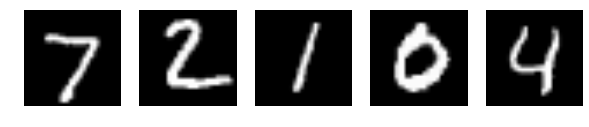

In [3]:
no_plot_img = 5
plt.rcParams['figure.figsize'] = (10, 2)
fig, ax_list = plt.subplots(1, no_plot_img)
for i in range(no_plot_img):
    image = mnist.test.images[i].reshape((28, 28))
    label = np.argmax(mnist.test.labels[i])
    ax_list[i].axis('off')
    ax_list[i].imshow(image, cmap='gray')
plt.show()

# Training and visualization

In [4]:
def mnist_simple_autoencoder(hidden_dim, dropout_rate):
    # Dropout rate
    dr = tf.placeholder(tf.float32)

    # Input and output
    x  = tf.placeholder(tf.float32, [None, input_dim])
    y  = tf.placeholder(tf.float32, [None, output_dim])

    # Encoding
    W1 = tf.Variable(tf.random_normal([input_dim, hidden_dim]))
    b1 = tf.Variable(tf.random_normal([1]))
    h2 = tf.sigmoid(tf.add(tf.matmul(x, W1), b1))
    h2_d = tf.nn.dropout(h2, 1 - dr)

    # Decoding
    W2 = tf.Variable(tf.random_normal([hidden_dim, output_dim]))
    b2 = tf.Variable(tf.random_normal([1]))
    h = tf.sigmoid(tf.add(tf.matmul(h2_d, W2), b2))

    # Cost function
    cost = tf.reduce_mean(tf.square(tf.sub(y, h)))
    train_op = tf.train.AdamOptimizer(tf.Variable(0.01)).minimize(cost)

    with tf.Session() as sess:
        # Fit the model
        num_epochs = 50
        batch_size = 100
        tf.global_variables_initializer().run()
        for i in xrange(num_epochs):
            for j in xrange(mnist.train.num_examples / batch_size):
                batch_x, batch_y = mnist.train.next_batch(batch_size)
                sess.run(train_op, feed_dict={x:batch_x, y:batch_x, dr:dropout_rate})

        # Print the results
        reconstructions = sess.run(h, feed_dict={x:mnist.test.images, dr:0})
        no_plot_img = 5
        plt.rcParams['figure.figsize'] = (10, 2)
        fig, ax_list = plt.subplots(1, no_plot_img)
        for i in range(no_plot_img):
            image = reconstructions[i].reshape((28, 28))
            ax_list[i].axis('off')
            ax_list[i].imshow(image, cmap='gray')
        plt.show()

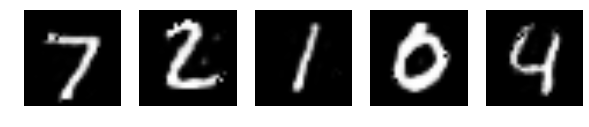

In [5]:
mnist_simple_autoencoder(hidden_dim = 100, dropout_rate = 0.0)

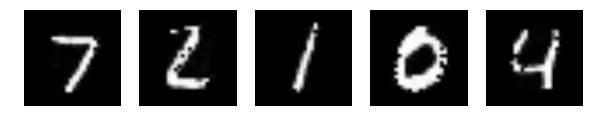

In [6]:
mnist_simple_autoencoder(hidden_dim = 400, dropout_rate = 0.0)

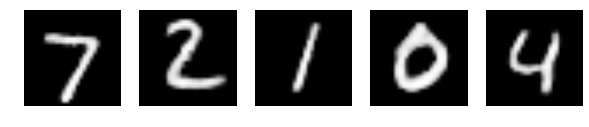

In [7]:
mnist_simple_autoencoder(hidden_dim = 100, dropout_rate = 0.25)

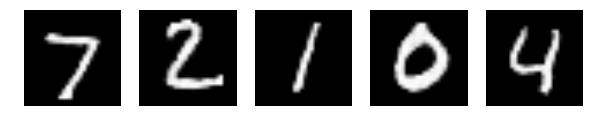

In [8]:
mnist_simple_autoencoder(hidden_dim = 400, dropout_rate = 0.25)

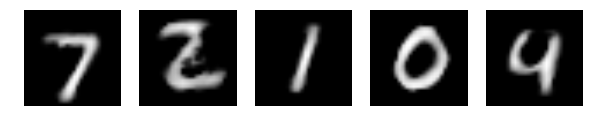

In [9]:
mnist_simple_autoencoder(hidden_dim = 100, dropout_rate = 0.75)

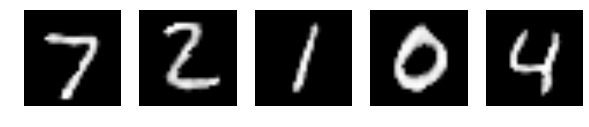

In [10]:
mnist_simple_autoencoder(hidden_dim = 400, dropout_rate = 0.75)